# HGSC EDA
Standard analysis pipeline to explore the data.

In [1]:
import scanpy as sc

In [2]:
import squidpy as sq

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [9]:
import seaborn as sns
import pandas as pd

In [ ]:
# https://www.nature.com/articles/s41591-024-03215-z#data-availability

In [4]:
import os

regenerate = False
if (not os.path.exists("G:/data/HGSC/h5ad/ST_Discovery_so.h5ad")) or regenerate:
    adata = sc.read_mtx("G:/data/HGSC/Csv/ST_Discovery_so_counts.mtx").T
    metadata = pd.read_csv("G:/data/HGSC/Csv/ST_Discovery_so_metadata.csv", index_col=0)
    features = pd.read_csv("G:/data/HGSC/Csv/ST_Discovery_so_features.txt", index_col=0, header=None)
    features.index.name = 'gene_symbol'
    adata.obs = metadata
    adata.var = features
    adata.write_h5ad("G:/data/HGSC/h5ad/ST_Discovery_so.h5ad")
else:
    adata = sc.read_h5ad("G:/data/HGSC/h5ad/ST_Discovery_so.h5ad")

In [5]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,samples,patients,sites_binary,cell.types,cell.subtypes,x,y
SMI_T10_F001_c1017,SMI,848,357,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,1493.3500,3151.233
SMI_T10_F001_c102,SMI,731,319,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,2623.2000,3607.450
SMI_T10_F001_c1062,SMI,236,155,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,850.5670,3143.833
SMI_T10_F001_c1064,SMI,609,300,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,3222.7300,3152.586
SMI_T10_F001_c1075,SMI,310,174,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,78.0125,3179.012
...,...,...,...,...,...,...,...,...,...,...
SMI_T14_F020_c5758,SMI,100,63,SMI_T14_F020,HGSC89,Omentum,TNK.cell,CD4.T.cell.DN,5170.4400,431.900
SMI_T14_F020_c734,SMI,141,88,SMI_T14_F020,HGSC89,Omentum,Fibroblast,Fibroblast,768.7000,3188.400
SMI_T14_F020_c875,SMI,78,60,SMI_T14_F020,HGSC89,Omentum,Malignant,Malignant,42.5833,3070.350
SMI_T14_F020_c3288,SMI,104,58,SMI_T14_F020,HGSC89,Omentum,Fibroblast,Fibroblast,48.9889,1751.740


In [15]:
adata.obsm['spatial'] = adata.obs[['x', 'y']].to_numpy()

In [16]:
# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Find highly variable genes
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Scale the data
sc.pp.scale(adata, max_value=10)

# Perform PCA
sc.tl.pca(adata, svd_solver='arpack')

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib

In [ ]:
# Compute the neighborhood graph
sc.pp.neighbors(adata)

# Compute UMAP
sc.tl.umap(adata)

c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = 

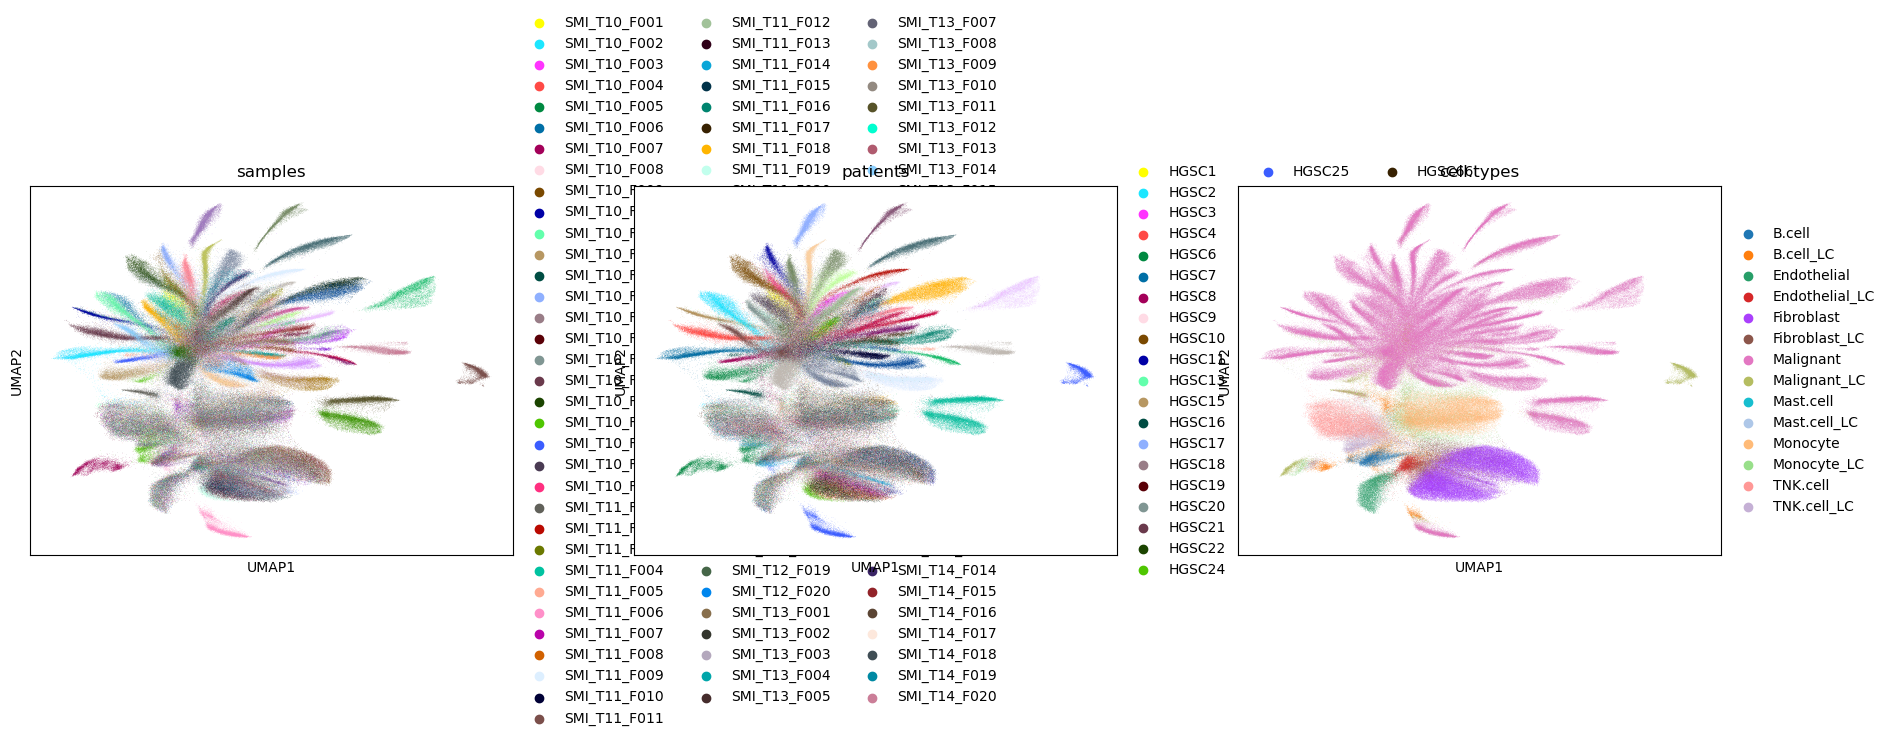

In [17]:
# Plot UMAP
sc.pl.umap(adata, color=['samples', 'patients', 'cell.types'])

<Axes: xlabel='samples', ylabel='patients'>

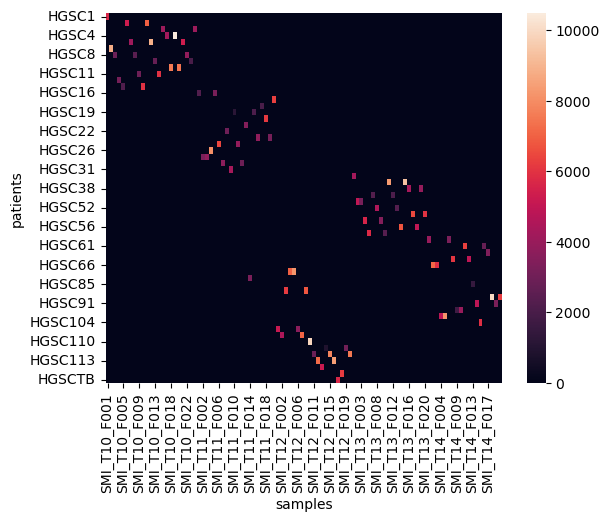

In [10]:
sns.heatmap(pd.crosstab(adata.obs['patients'], adata.obs['samples']))

In [14]:
import sys
sys.path.append("..")
import steamboat as sf

In [ ]:
adatas = []
for i in adata.obs['brain_section_label'].unique():
    adatas.append(adata[adata.obs['brain_section_label'] == i])

adatas = sf.prep_adatas(adatas, log_norm=False)
dataset = sf.make_dataset(adatas, sparse_graph=True)